In [1]:
# Install package utils
import sys
!{sys.executable} -m pip install --user -q -q -e ../

In [4]:
! pip install -q xarray

In [5]:
from mobitic_utils.utils_s3 import get_pandas_s3
from mobitic_utils.maps import cmap_raster

In [6]:
df = get_pandas_s3('01b_carreau100m_moyenne_variance.csv')

In [7]:
import xarray as xr

In [8]:
raster = df.set_index(['x_tile', 'y_tile']).to_xarray()

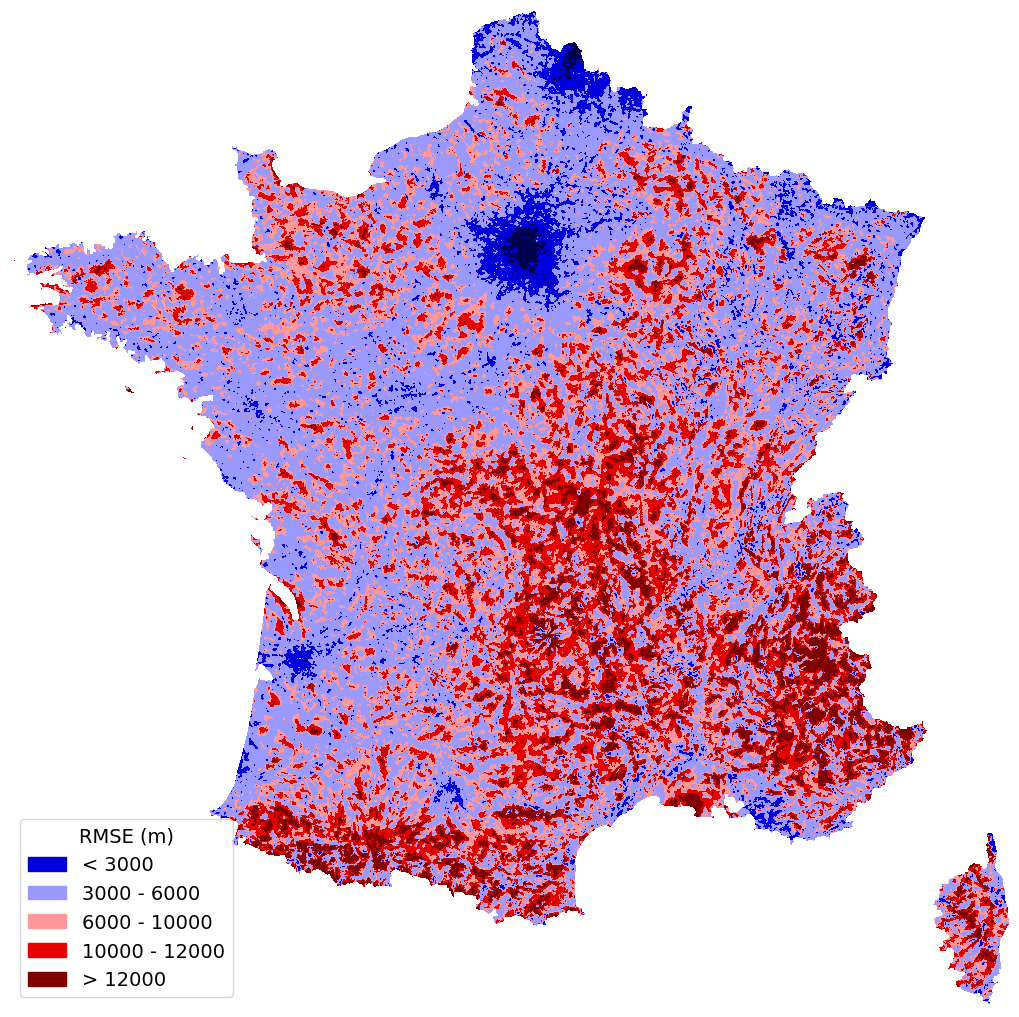

In [9]:
import numpy as np
H = np.sqrt(raster['inertie_intra_variance_unif'][:].T + raster['inertie_extra_biais_unif'][:].T**2)
cmap_raster(H,
    bins=[3000, 6000, 10000, 12000, 15000],
            cmap_col = "seismic",
            title_leg = "RMSE (m)",
            png = "carte_errors.png"
)

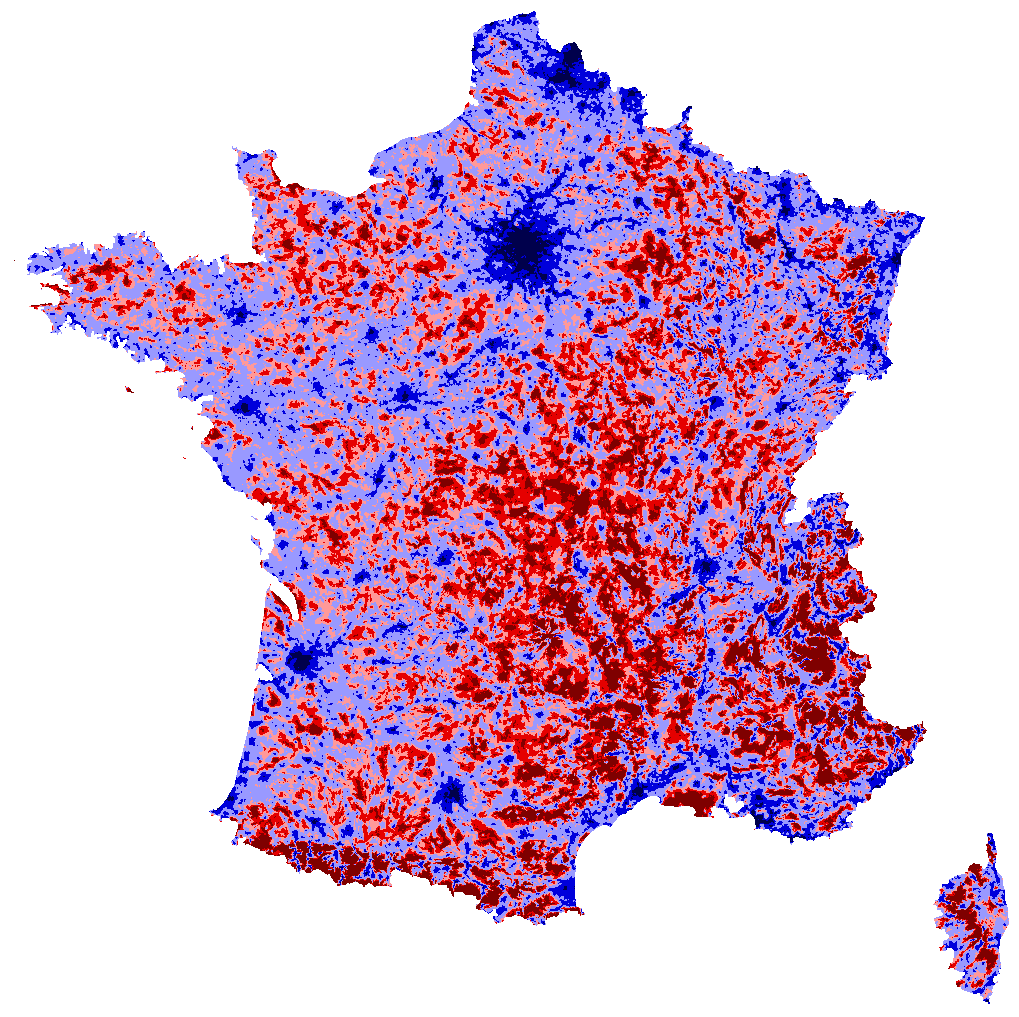

In [10]:
H = np.sqrt(raster['inertie_intra_variance_nbpersm'][:].T + raster['inertie_extra_biais_nbpersm'][:].T**2)
cmap_raster(H,
    bins=[3000, 6000,10000, 12000, 15000],
            cmap_col = "seismic",
            title_leg ="RMSE (m)",
            png = "carte_errors_prior_nbpersm.png",
            legend = False
)

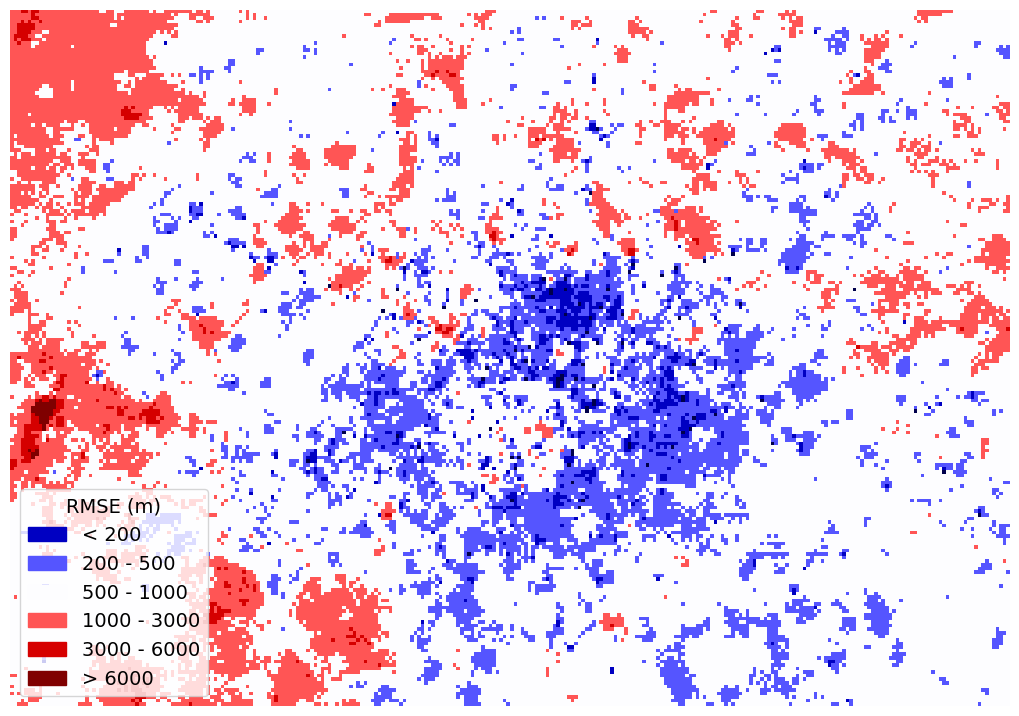

In [11]:
raster_paris = raster.where((raster.x_tile> 585368) & (raster.x_tile < 613390) & (raster.y_tile> 2420157) & (raster.y_tile < 2439660), drop = True)

H = np.sqrt(raster_paris['inertie_intra_variance_unif'][:].T + raster_paris['inertie_extra_biais_unif'][:].T**2)
cmap_raster(H,
    bins=[200,500,1000,3000, 6000, 10000],
            cmap_col = "seismic",
            title_leg = "RMSE (m)",
            png = "carte_errors_paris.png"
)

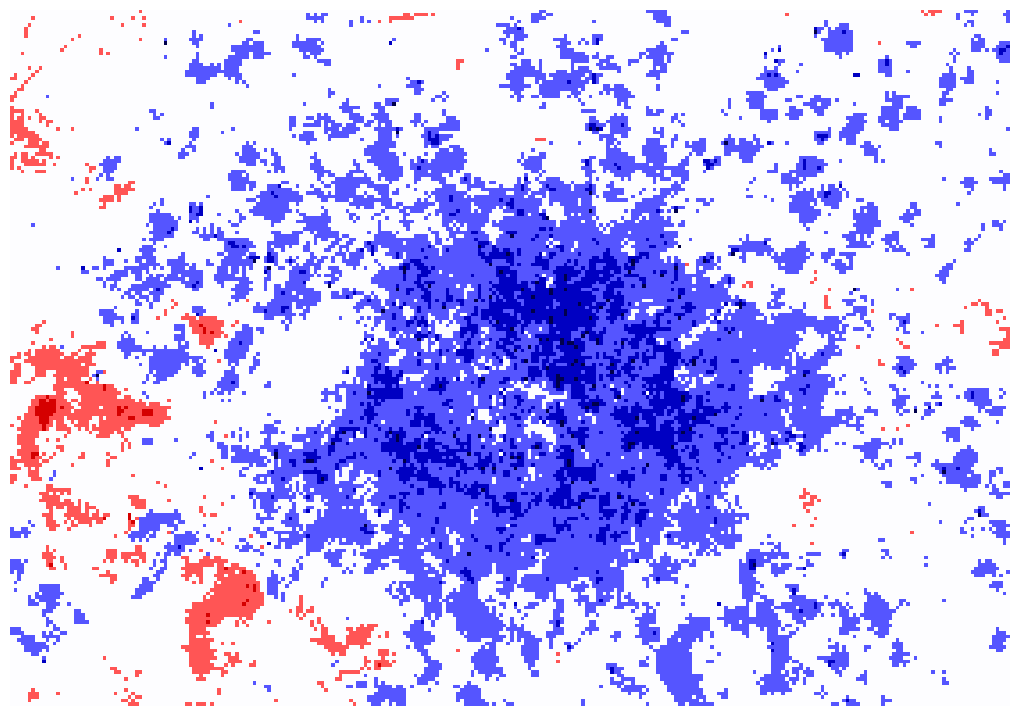

In [12]:
H = np.sqrt(raster_paris['inertie_intra_variance_nbpersm'][:].T + raster_paris['inertie_extra_biais_nbpersm'][:].T**2)
cmap_raster(H,
    bins=[200,500,1000,3000, 6000, 10000],
            cmap_col = "seismic",
            title_leg = "RMSE (m)",
            png = "carte_errors_paris_prior_nbpersm.png",
            legend = False
)